In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("d1-basketball-data-93-23.csv")
raw_df.drop("Unnamed: 0", inplace=True, axis=1)
raw_df.head()

,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,...,eFG%,TOV%,FT/FGA,Conf_Rk,Conf,region_seed,qual_for_ncaa,final_four,ncaa_champ,season
0,Air Force,28,9,19,0.321,-7.45,2.05,3.0,15.0,3.0,...,0.458,17.4,0.263,10.0,WAC,-1.0,False,False,False,1993
1,Akron,26,8,18,0.308,-10.69,-5.06,3.0,15.0,4.0,...,0.488,18.4,0.241,10.0,MAC,-1.0,False,False,False,1993
2,Alabama,29,16,13,0.552,9.66,7.83,7.0,9.0,11.0,...,0.513,19.4,0.271,10.0,SEC,-1.0,False,False,False,1993
3,Alabama State,27,14,13,0.519,-8.49,-9.70,9.0,5.0,7.0,...,0.518,20.7,0.305,3.0,SWAC,-1.0,False,False,False,1993
4,Alcorn State,27,7,20,0.259,-11.04,-4.58,5.0,9.0,3.0,...,0.487,19.7,0.188,7.0,SWAC,-1.0,False,False,False,1993


In [3]:
raw_df.shape

(9695, 31)

In [6]:
raw_df.dtypes

School            object
G                  int64
W                  int64
L                  int64
W-L%             float64
SRS              float64
SOS              float64
W.1              float64
L.1              float64
W.2              float64
L.2              float64
W.3              float64
L.3              float64
Tm.              float64
Opp.             float64
FTr              float64
3PAr             float64
TS%              float64
TRB%             float64
AST%             float64
BLK%             float64
eFG%             float64
TOV%             float64
FT/FGA           float64
Conf_Rk          float64
Conf              object
region_seed      float64
qual_for_ncaa       bool
final_four          bool
ncaa_champ          bool
season             int64
dtype: object

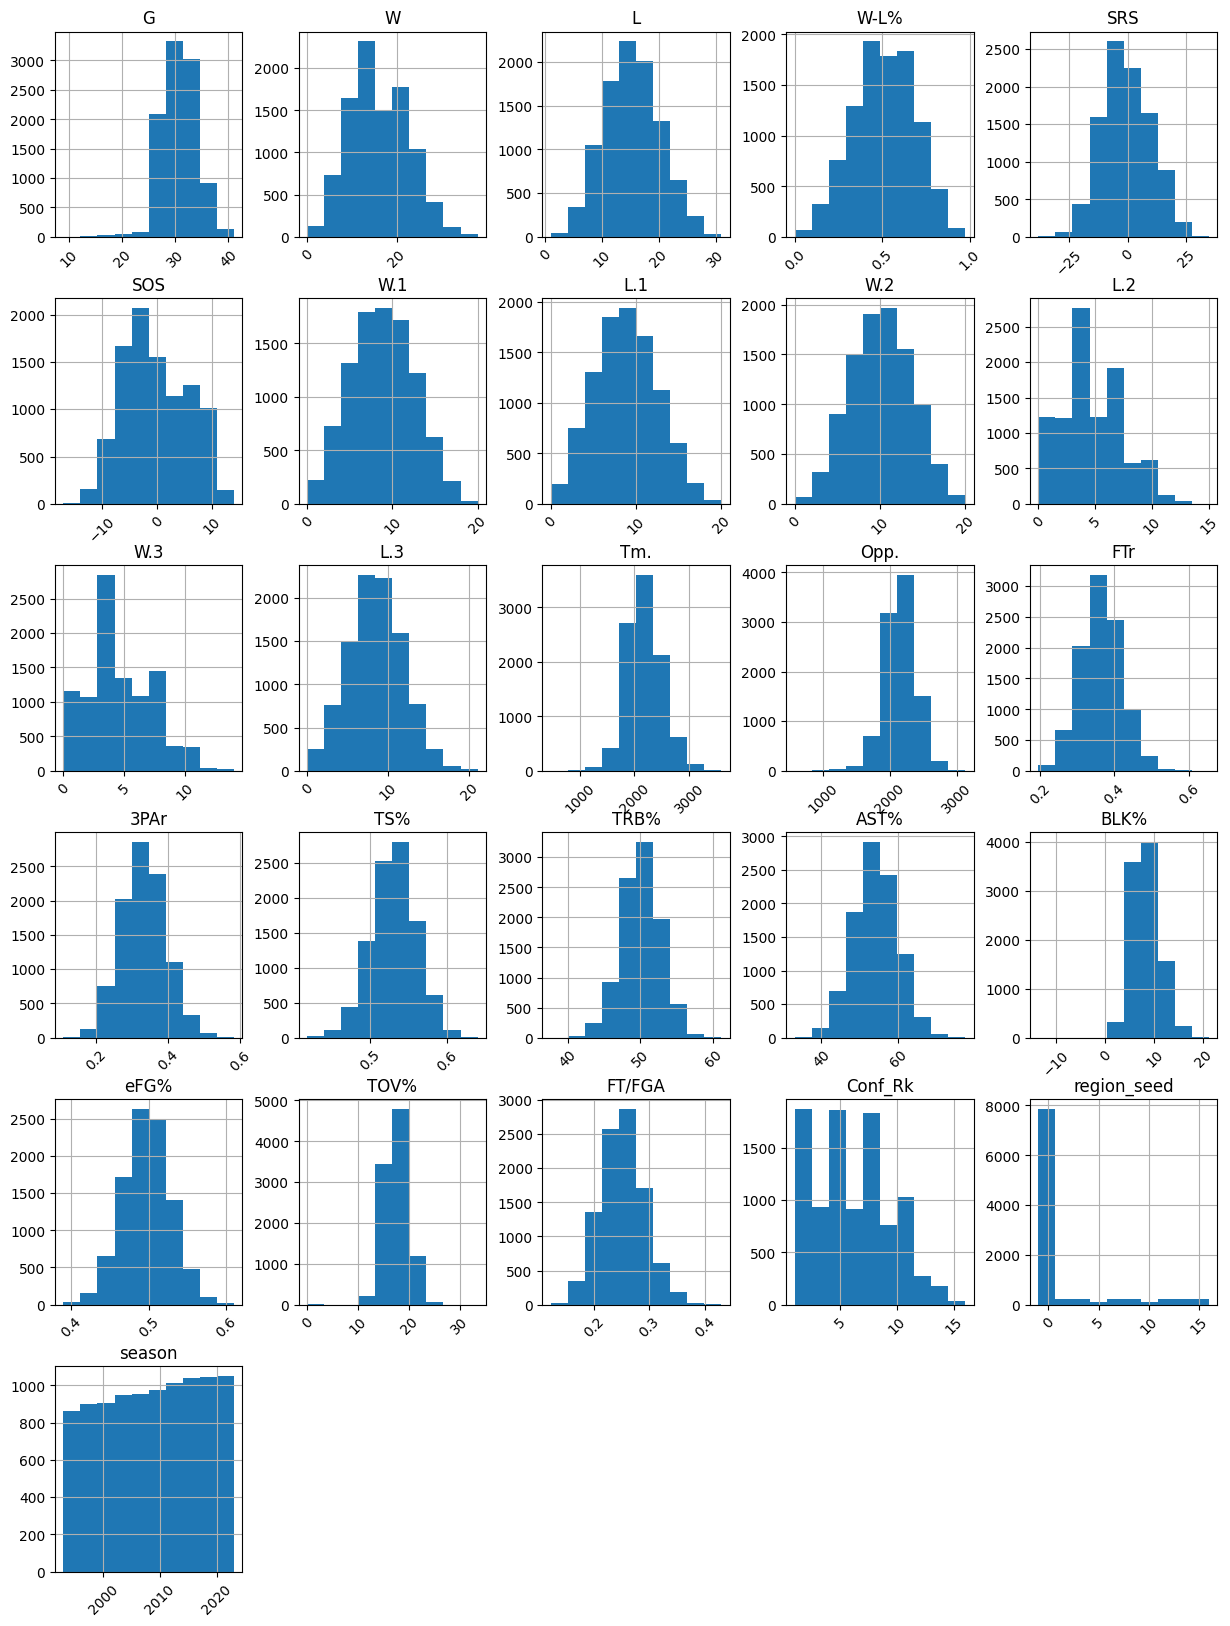

In [11]:
raw_df.hist(figsize=(15,20), xrot=45)
plt.show()

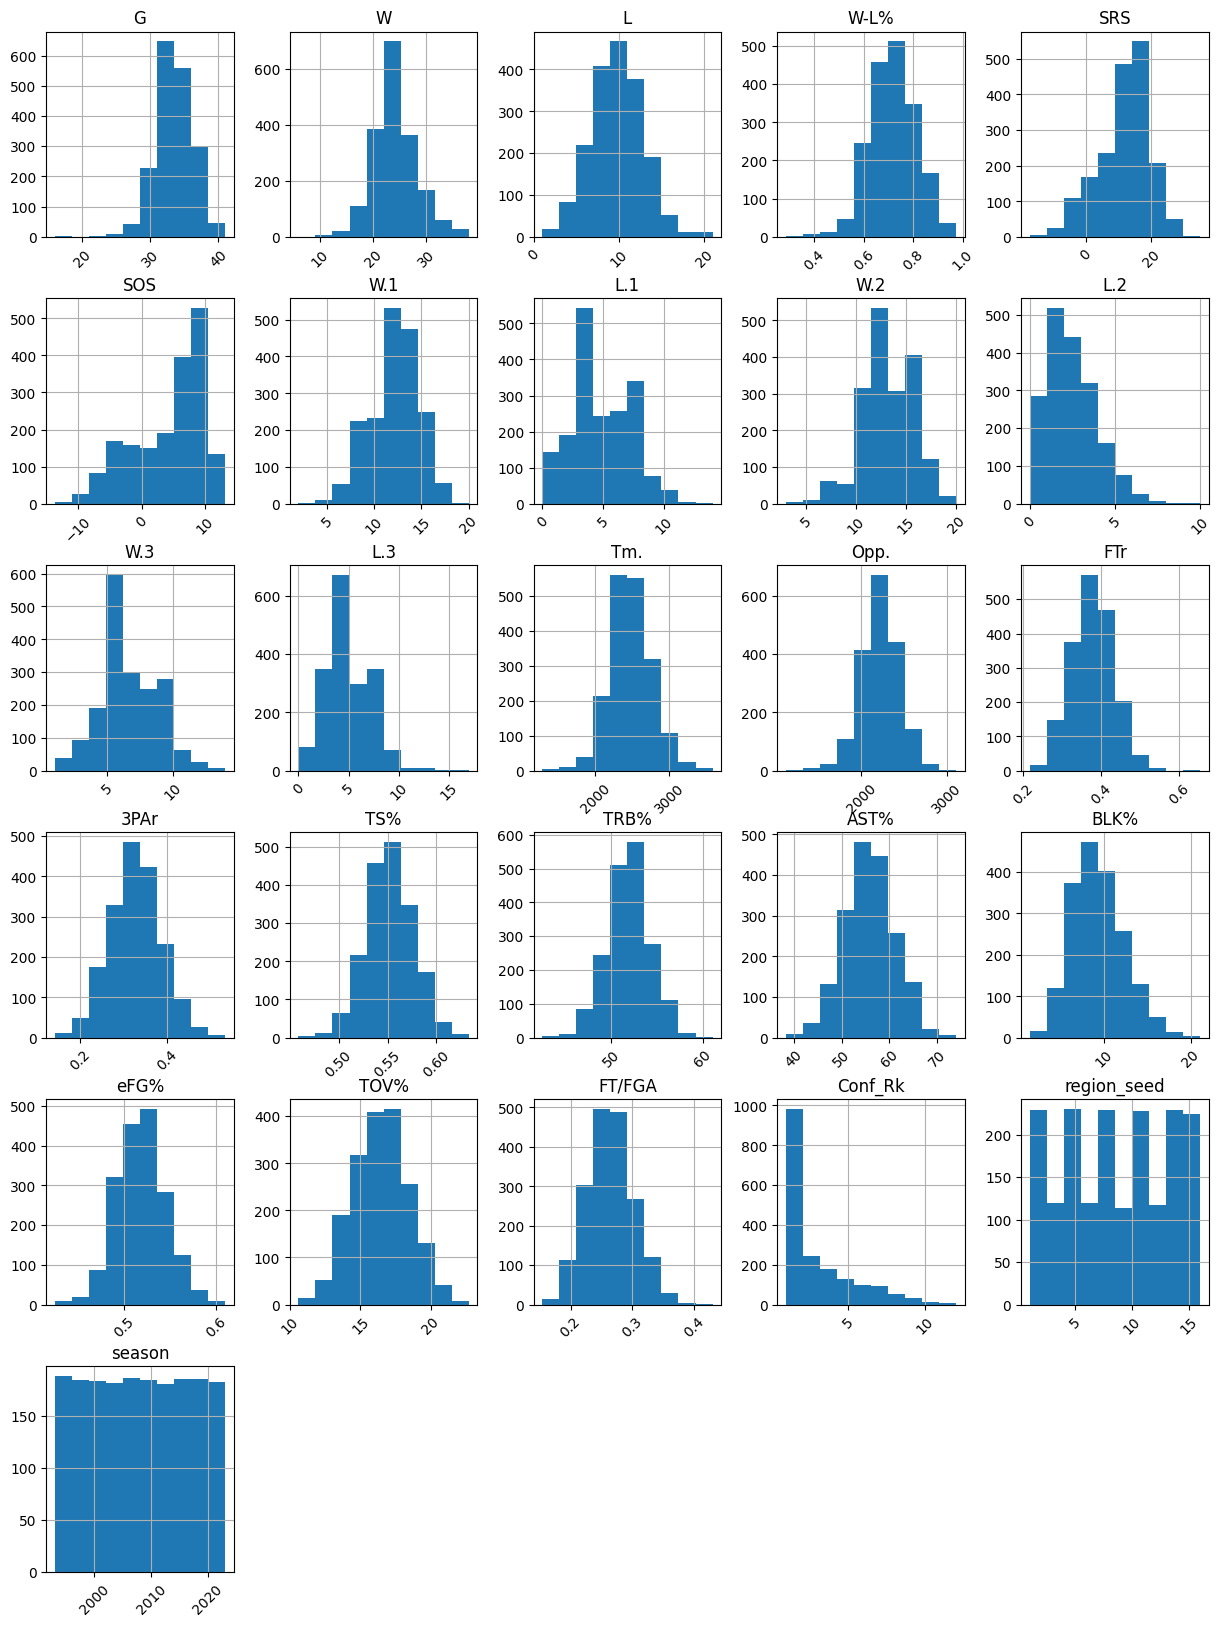

In [14]:
raw_df.loc[raw_df["qual_for_ncaa"]==True].hist(figsize=(15,20), xrot=45)
plt.show()

In [12]:
raw_df.describe()

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,TS%,TRB%,AST%,BLK%,eFG%,TOV%,FT/FGA,Conf_Rk,region_seed,season
count,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,...,9695.000000,9695.000000,9695.000000,9695.000000,9695.00000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000
mean,30.818773,16.004332,14.814028,0.510968,-0.561509,-0.274133,8.400619,8.349046,9.662713,4.512120,...,0.530812,50.086787,54.085312,8.135554,0.49683,17.505549,0.252133,5.881382,0.794430,2008.167096
std,3.139008,6.387557,4.908464,0.174930,10.321968,5.784272,3.672199,3.661971,3.581511,2.627133,...,0.029331,2.672792,5.733493,2.831087,0.03063,2.271522,0.039632,3.300374,4.217172,8.786356
min,9.000000,0.000000,1.000000,0.000000,-38.170000,-16.950000,0.000000,0.000000,0.000000,0.000000,...,0.418000,37.700000,33.000000,-13.700000,0.39000,0.000000,0.123000,1.000000,-1.000000,1993.000000
25%,29.000000,11.000000,11.000000,0.387000,-8.005000,-4.790000,6.000000,6.000000,7.000000,2.000000,...,0.511000,48.400000,50.200000,6.000000,0.47600,16.000000,0.225000,3.000000,-1.000000,2001.000000
50%,31.000000,16.000000,15.000000,0.516000,-1.300000,-1.140000,8.000000,8.000000,10.000000,4.000000,...,0.531000,50.200000,54.000000,7.900000,0.49700,17.400000,0.251000,6.000000,-1.000000,2008.000000
75%,33.000000,20.000000,18.000000,0.636000,6.865000,4.600000,11.000000,11.000000,12.000000,6.000000,...,0.550000,51.900000,58.000000,10.000000,0.51700,19.000000,0.278000,8.000000,-1.000000,2016.000000
max,41.000000,38.000000,31.000000,0.974000,34.790000,13.890000,20.000000,20.000000,20.000000,15.000000,...,0.639000,61.100000,77.500000,21.100000,0.61000,33.500000,0.430000,16.000000,16.000000,2023.000000


In [16]:
qual_df = raw_df.loc[raw_df["qual_for_ncaa"]==True]
non_qual_df = raw_df.loc[raw_df["qual_for_ncaa"]==False]

print("All schools, every season:")
print(raw_df.describe(include='object'), "\n")
print("All NCAA tournament qualifying schools:")
print(qual_df.describe(include='object'), "\n")
print("All non- NCAA tournament qualifying schools:")
print(non_qual_df.describe(include='object'), "\n")

All schools, every season:
                School      Conf
count             9695      9695
unique             363        44
top     South Carolina  Big East
freq                32       382 

All NCAA tournament qualifying schools:
        School     Conf
count     1838     1838
unique     275       41
top     Kansas  Big Ten
freq        30      178 

All non- NCAA tournament qualifying schools:
                    School  Conf
count                 7857  7857
unique                 362    44
top     Saint Francis (PA)   MAC
freq                    30   323 



In [47]:
grouped_df = raw_df[["Conf", "season"]].groupby("Conf").count().sort_values("season", 
                                                                                  ascending=False)
grouped_df.head(10)

,season
Conf,
Big East,382
A-10,381
SEC,381
Big Ten,357
MAC,356
ACC,350
CUSA,346
Sun Belt,336
Southland,334


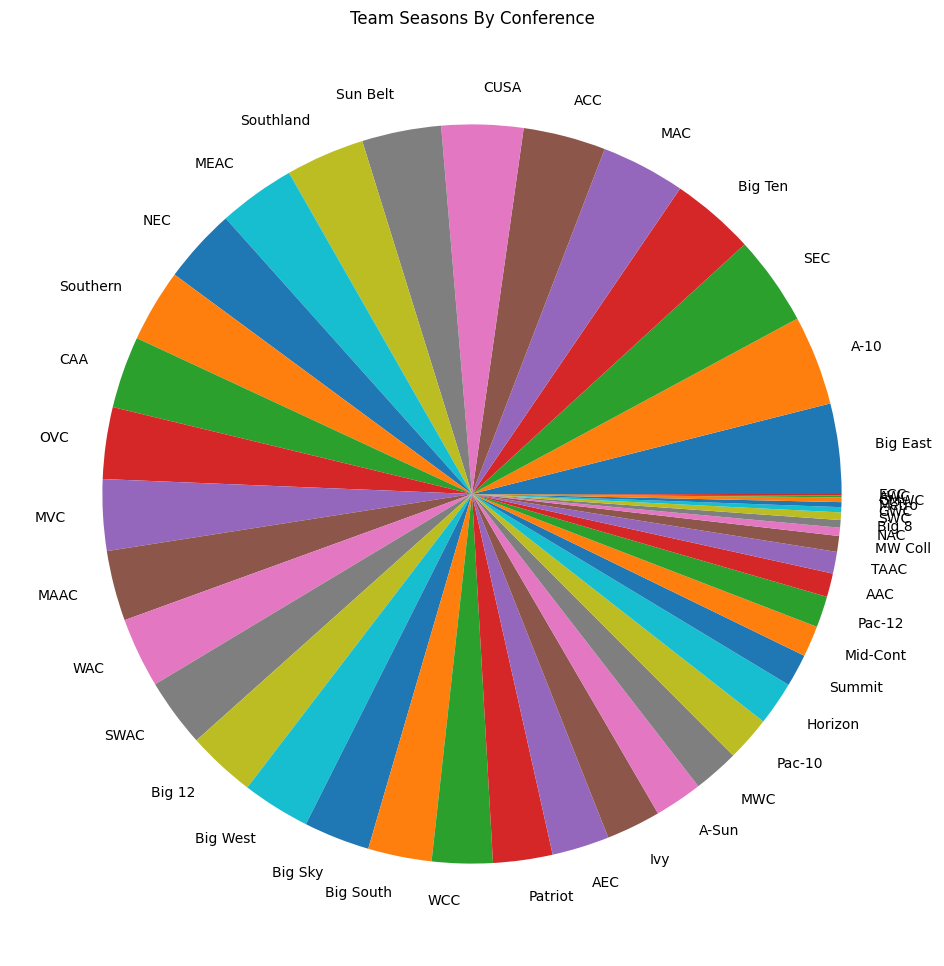

In [49]:
plt.figure(figsize=(12,12))
plt.title("Team Seasons By Conference")
plt.pie(grouped_df['season'], labels=grouped_df.index)
plt.show()

In [45]:
grouped_qual_df = qual_df[["Conf", "season"]].groupby("Conf").count().sort_values("season", 
                                                                                  ascending=False)
grouped_qual_df.head(10)


,season
Conf,
Big Ten,178
SEC,164
ACC,164
Big East,155
Big 12,151
A-10,82
Pac-10,77
CUSA,57
MVC,51


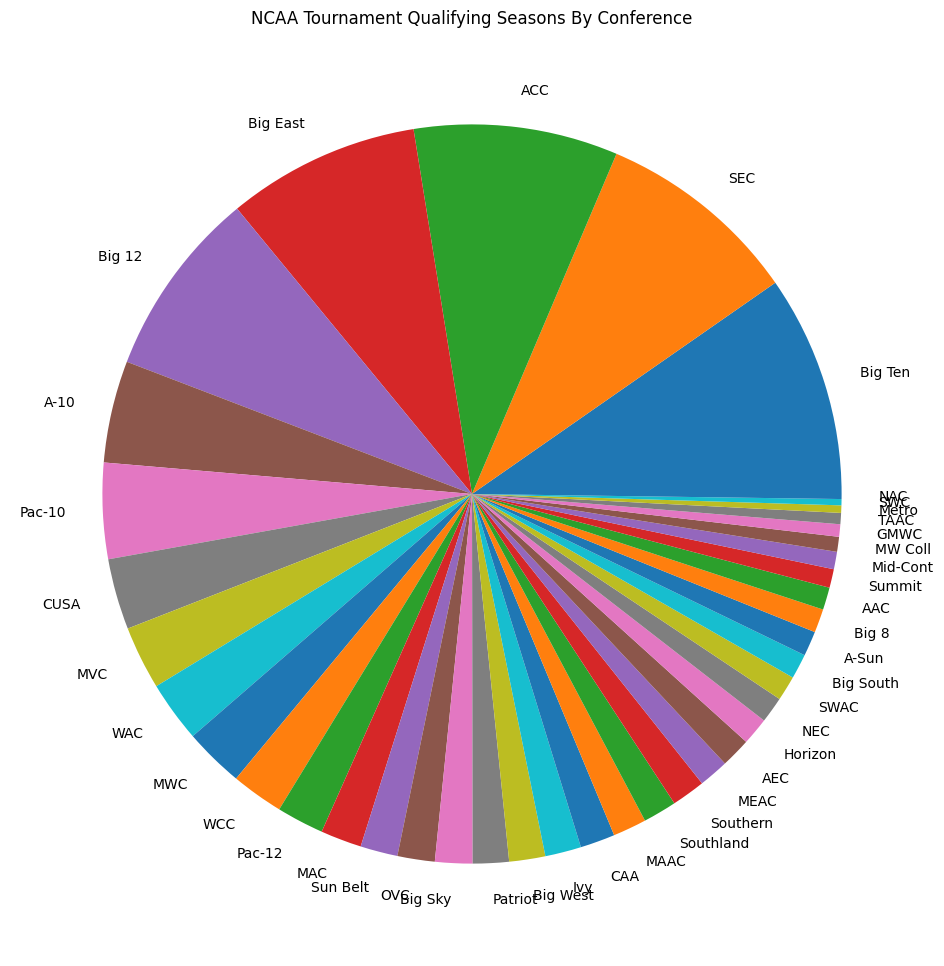

In [50]:
plt.figure(figsize=(12,12))
plt.title("NCAA Tournament Qualifying Seasons By Conference")
plt.pie(grouped_qual_df['season'], labels=grouped_qual_df.index)
plt.show()

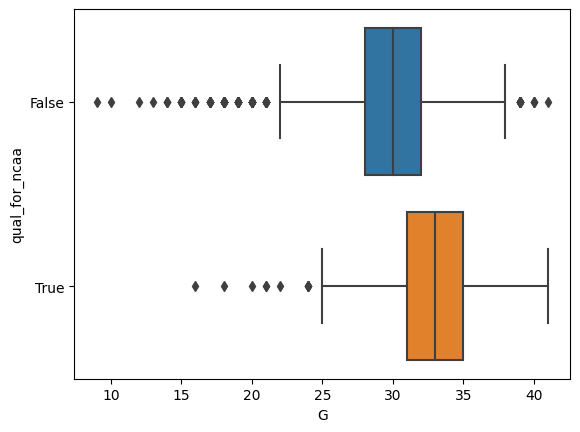

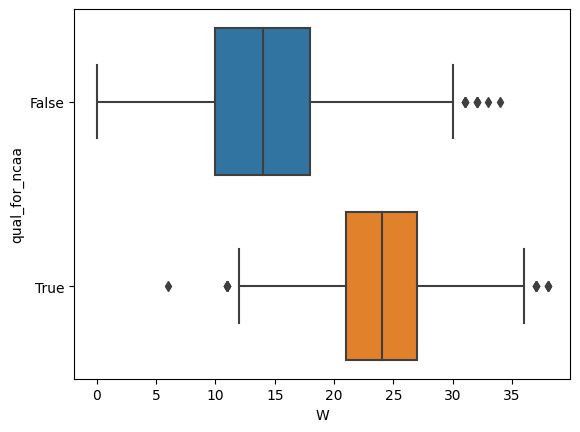

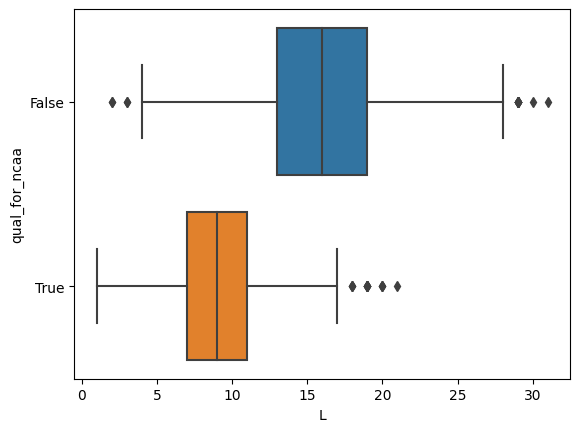

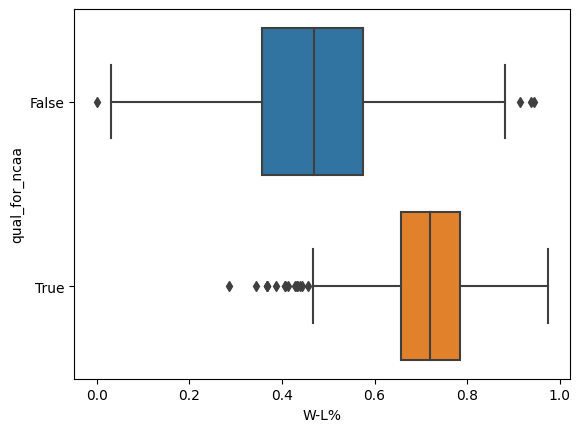

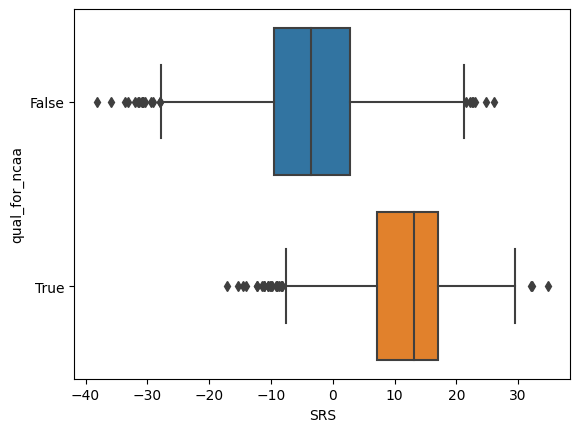

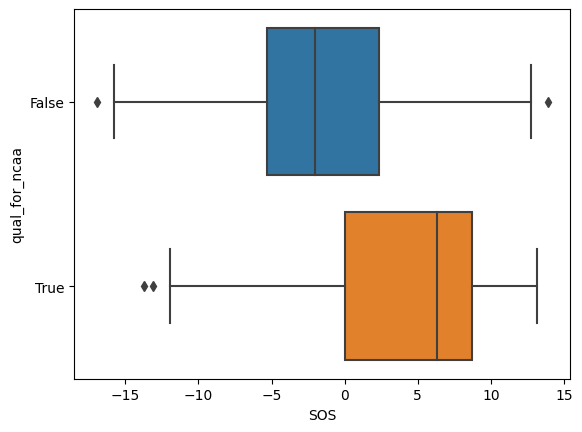

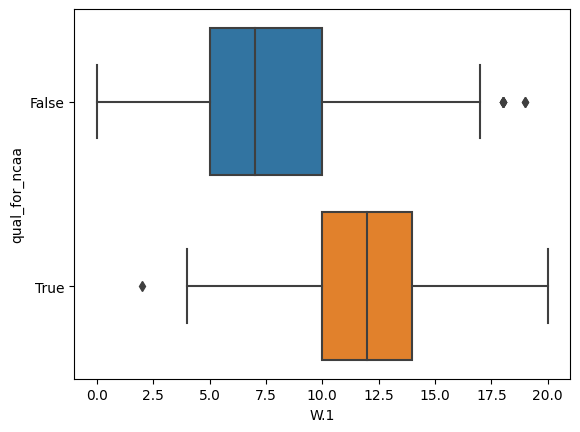

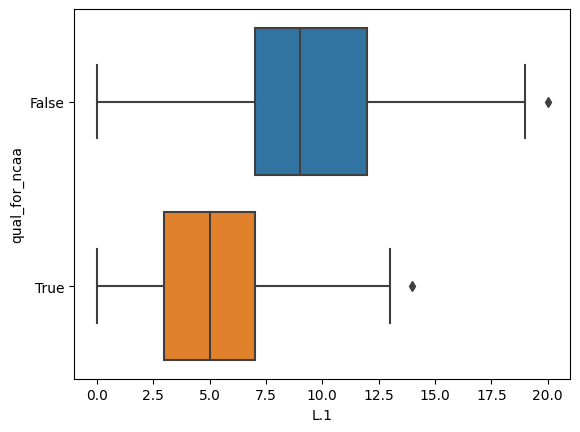

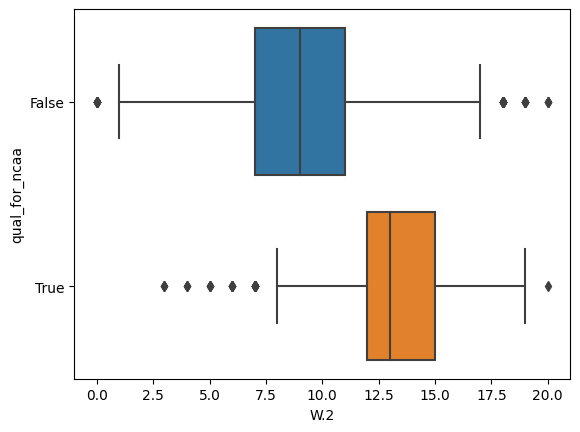

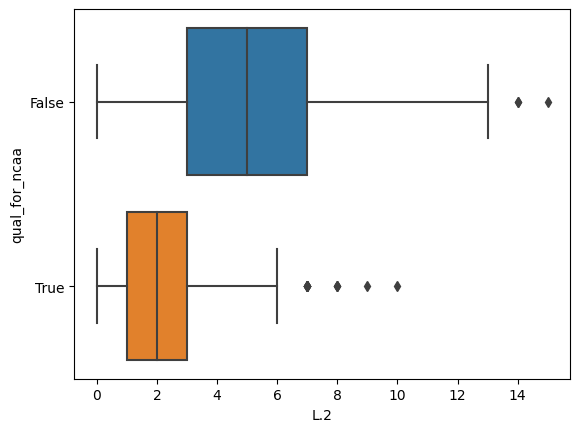

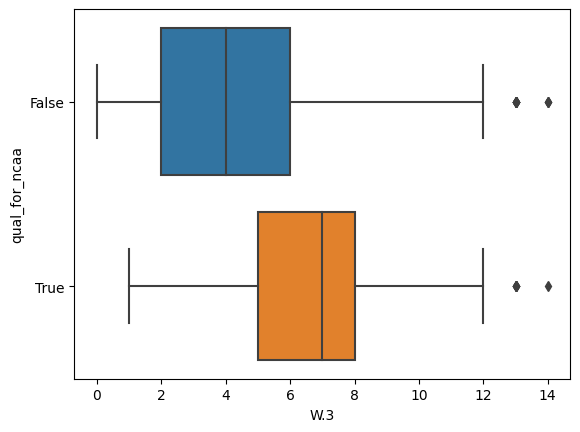

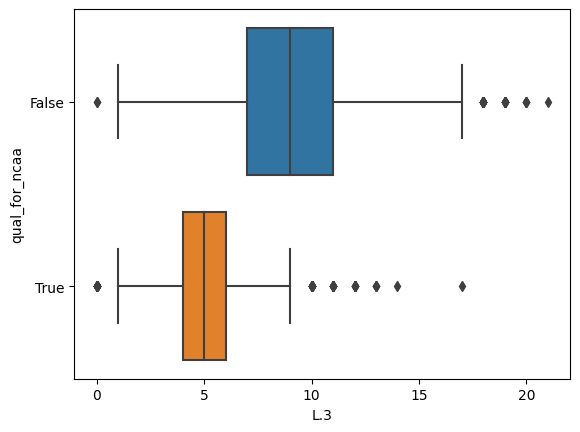

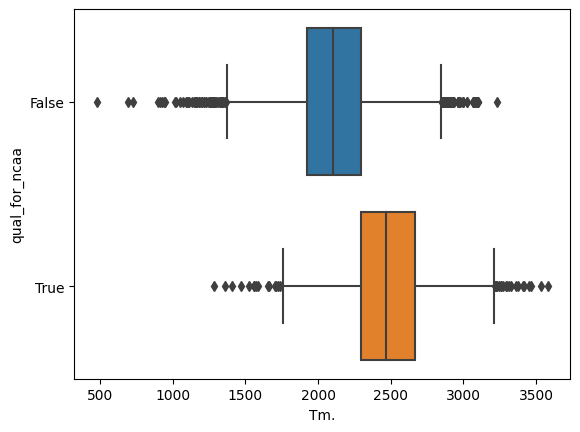

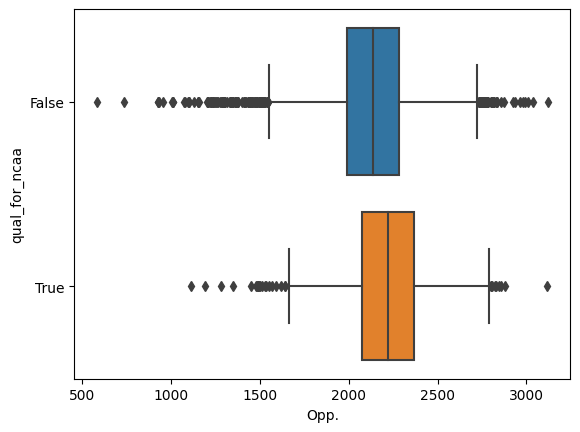

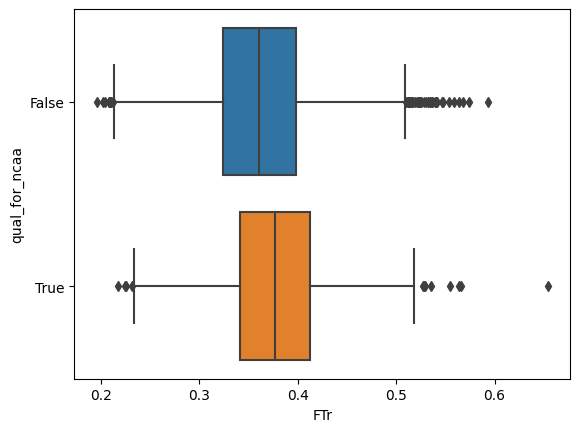

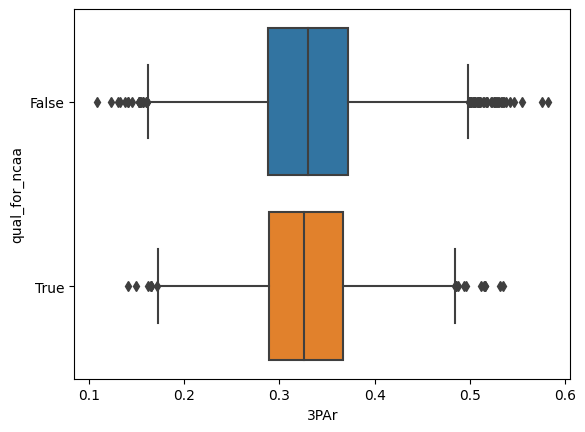

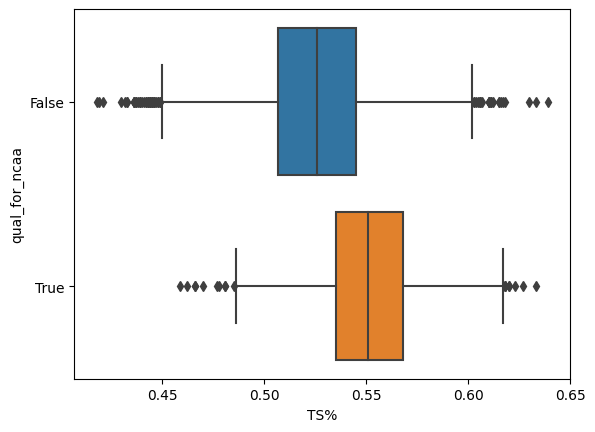

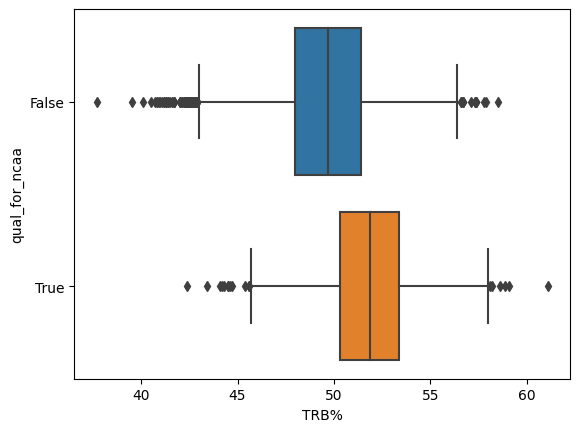

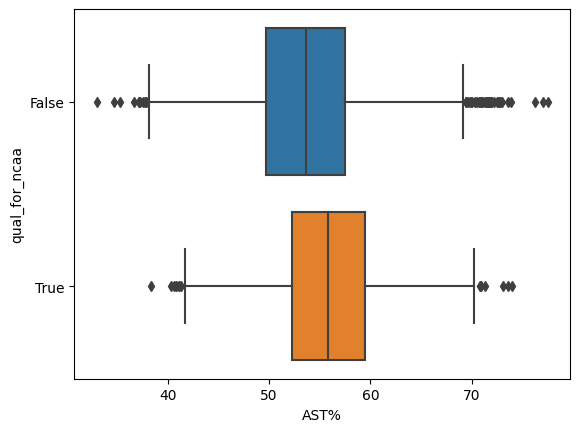

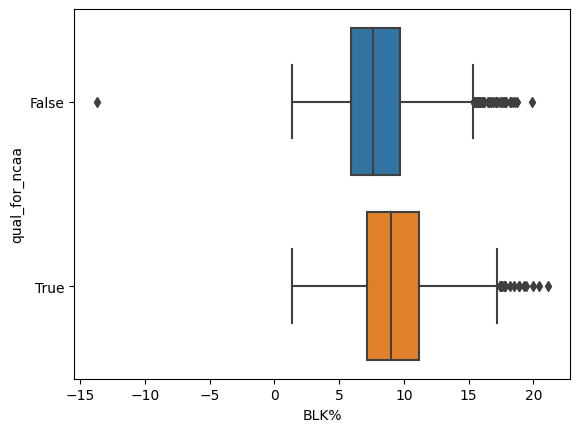

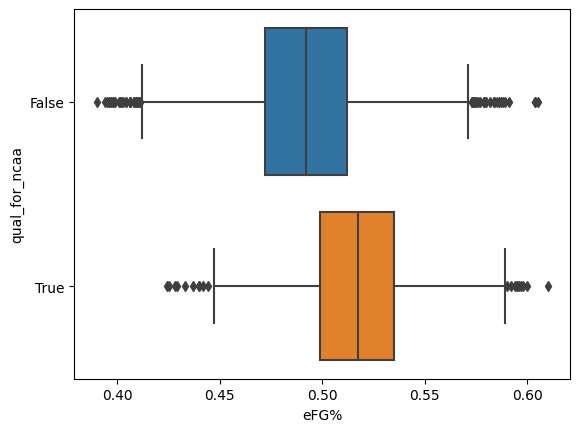

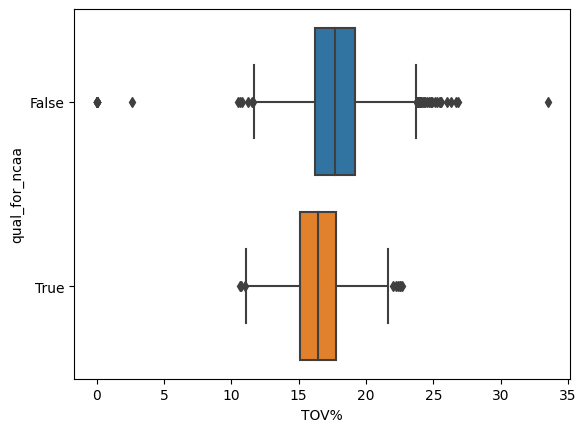

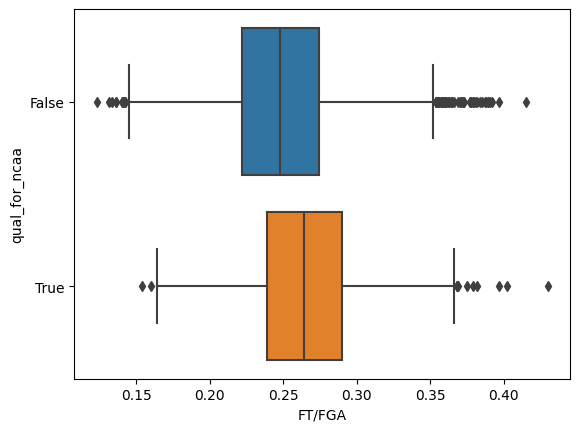

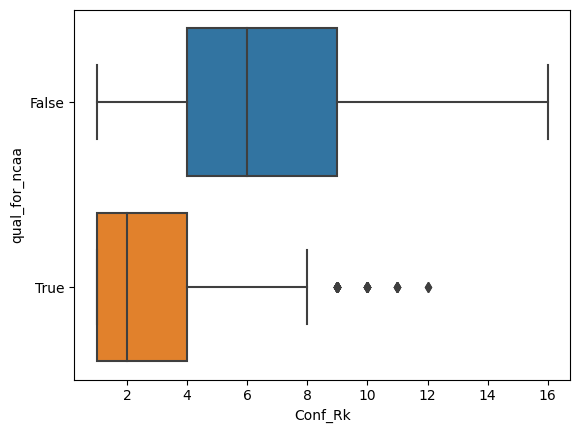

In [76]:
num_cols = raw_df.columns[1:25]

raw_df[num_cols]

for col in num_cols:
    # plt.figure()
    sns.boxplot(y=raw_df["qual_for_ncaa"].astype("str"), x=raw_df[col].astype("double"), data=raw_df)
    plt.show()

# sns.boxplot(y=raw_df["qual_for_ncaa"].astype("str"), x=raw_df[num_cols[23]].astype("double"), data=raw_df)

In [109]:
# print(list(num_cols).append("qual_for_ncaa"))

# cols_for_grouping = list(num_cols).append("qual_for_ncaa")
# print(cols_for_grouping)
means_df = raw_df.groupby("qual_for_ncaa").mean()
means_df

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,AST%,BLK%,eFG%,TOV%,FT/FGA,Conf_Rk,region_seed,final_four,ncaa_champ,season
qual_for_ncaa,,,,,,,,,,,,,,,,,,,,,
False,30.240932,14.139748,16.100802,0.462546,-3.425909,-1.349098,7.556828,9.181112,8.845488,5.105002,...,53.658114,7.858101,0.491914,17.755721,0.249083,6.535828,-1.00000,0.000764,0.000636,2008.307751
True,33.288901,23.974973,9.313384,0.717958,11.683101,4.321077,12.007617,4.792165,13.156148,1.977693,...,55.911480,9.321600,0.517849,16.436126,0.265172,3.083787,8.46518,0.062024,0.013602,2007.565832


In [110]:
var_df = raw_df.groupby("qual_for_ncaa").var()
var_df

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,AST%,BLK%,eFG%,TOV%,FT/FGA,Conf_Rk,region_seed,final_four,ncaa_champ,season
qual_for_ncaa,,,,,,,,,,,,,,,,,,,,,
False,8.640646,27.836629,18.825377,0.023284,73.734881,27.875209,11.385040,11.529185,10.844249,6.135740,...,32.946050,7.370739,0.000865,5.140403,0.001541,9.970235,0.000000,0.000763,0.000636,76.914697
True,7.512027,17.829531,9.277894,0.009012,61.801679,31.280386,6.410394,5.841376,6.247243,2.251544,...,28.460951,9.038123,0.000708,3.833664,0.001487,5.179693,21.205918,0.058209,0.013424,78.016077


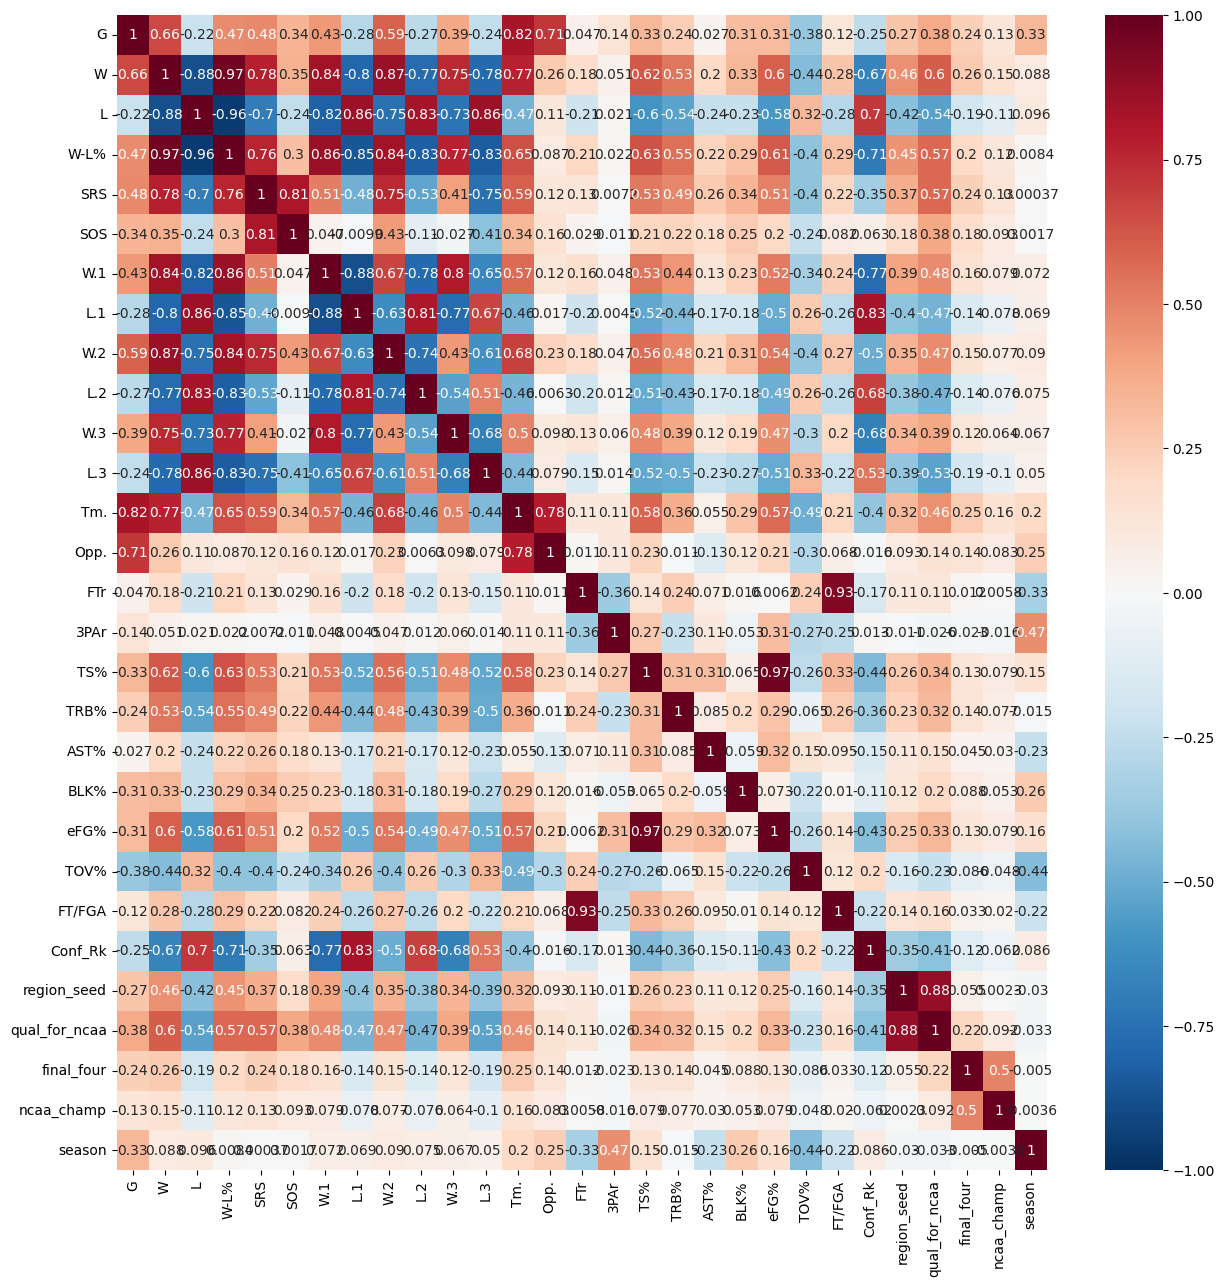

In [114]:
corr_df = raw_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_df, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()